# Kidney Disease
### Tom Waldin 26/01/2023
CKD is a condition in which the kidneys are damaged and cannot filter blood as well as they should. Because of this, excess fluid and waste from blood remain in the body and may cause other health problems, such as heart disease and stroke.

Data is from UCI machine learning repository.

Source: Dr.P.Soundarapandian.M.D.,D.M
(Senior Consultant Nephrologist),
Apollo Hospitals,Tamilnadu,
India.

https://archive.ics.uci.edu/ml/datasets/Chronic_Kidney_Disease

Only 400 data points - 25 features 

Classification: Chronic Kidney Disease or Not

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif

## Load and Clean Data

In [3]:
filename = '../DATA/kidney_disease.csv'
kidney_disease = pd.read_csv(filename)

kidney_disease.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


Checking the amount of catagories matches given attribute information and is of the correct type

In [4]:
for col in kidney_disease.columns:
    if kidney_disease[col].dtype != 'float64' and kidney_disease[col].dtype != 'int64':
        print(f"Column {col} has {len(kidney_disease[col].unique())} unique categories.")

Column rbc has 3 unique categories.
Column pc has 3 unique categories.
Column pcc has 3 unique categories.
Column ba has 3 unique categories.
Column pcv has 45 unique categories.
Column wc has 93 unique categories.
Column rc has 50 unique categories.
Column htn has 3 unique categories.
Column dm has 6 unique categories.
Column cad has 4 unique categories.
Column appet has 3 unique categories.
Column pe has 3 unique categories.
Column ane has 3 unique categories.
Column classification has 3 unique categories.


In [4]:
kidney_disease.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

### Issues
pcv, wc, rc should be numeric. 
 
dm should only have 2 unique catagories. 

cad should only have 2 unique catagories. 

classification should only have 2 unique catagories


In [5]:
columns_to_convert = ['pcv', 'wc', 'rc']

for col in columns_to_convert:
    kidney_disease[col]= kidney_disease[col].str.replace('\t', '0')
    kidney_disease[col]= kidney_disease[col].str.replace('?', '0')
    kidney_disease[col]= kidney_disease[col].str.replace('', '0')
    kidney_disease[col] = kidney_disease[col].astype('float64')

C:\Users\tw484\AppData\Local\Temp\ipykernel_23684\260794441.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  kidney_disease[col]= kidney_disease[col].str.replace('?', '0')


In [6]:
#replacing those zeros with the median
def replace_with_median(df,cols):
    for col in cols:
        median = df[col][df[col] != 0].median()
        df[col].replace(0, median, inplace=True)
    return df

replace_with_median(kidney_disease, columns_to_convert)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,4040.0,70800000.0,50.02,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,3080.0,60000000.0,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,3010.0,70500000.0,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,3020.0,60700000.0,30.09,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,3050.0,70300000.0,40.06,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,4070.0,60700000.0,40.09,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,5040.0,70800000.0,60.02,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,4090.0,60600000.0,50.04,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,5010.0,70200000.0,50.09,no,no,no,good,no,no,notckd


In [7]:
kidney_disease['dm'].value_counts()

no       258
yes      134
\tno       3
\tyes      2
 yes       1
Name: dm, dtype: int64

In [8]:
kidney_disease['cad'].value_counts()

no      362
yes      34
\tno      2
Name: cad, dtype: int64

In [9]:
kidney_disease['classification'].value_counts()

ckd       248
notckd    150
ckd\t       2
Name: classification, dtype: int64

All problematic catagories appear to be due to a typo during data input (tab or white space) so these will be removed

In [7]:
clean_dm = {'\tno':'no', '\tyes':'yes', ' yes':'yes', 'yes':'yes', 'no':'no'}
clean_cad = {'\tno':'no', 'yes':'yes', 'no':'no'}
clean_class = {'ckd\t':'ckd', 'ckd':'ckd', 'notckd':'notckd'}
kidney_disease['dm'] = kidney_disease['dm'].map(clean_dm)
kidney_disease['cad'] = kidney_disease['cad'].map(clean_cad)
kidney_disease['classification'] = kidney_disease['classification'].map(clean_class)

Check

In [8]:
for col in kidney_disease.columns:
    if kidney_disease[col].dtype != 'float64' and kidney_disease[col].dtype != 'int64':
        print(f"Column {col} has {len(kidney_disease[col].unique())} unique categories.")

Column rbc has 3 unique categories.
Column pc has 3 unique categories.
Column pcc has 3 unique categories.
Column ba has 3 unique categories.
Column htn has 3 unique categories.
Column dm has 3 unique categories.
Column cad has 3 unique categories.
Column appet has 3 unique categories.
Column pe has 3 unique categories.
Column ane has 3 unique categories.
Column classification has 2 unique categories.


Many columns have null values

In [12]:
kidney_disease.isna().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification    150
dtype: int64

Replacing null values, mean for numeric and mode for catagorical. This is logical for each of the variables

In [9]:
def replace_null_with_mean_mode(df):
    for col in df.columns:
        if df[col].dtype == 'float64' or df[col].dtype == 'int64':
            # Replace null values with mean
            mean = df[col].mean()
            df[col].fillna(mean, inplace=True)
        else:
            # Replace null values with mode
            mode = df[col].mode()[0]
            df[col].fillna(mode, inplace=True)
    return df

Check

In [10]:
replace_null_with_mean_mode(kidney_disease)
kidney_disease.isna().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

## Exploratory Data Analysis

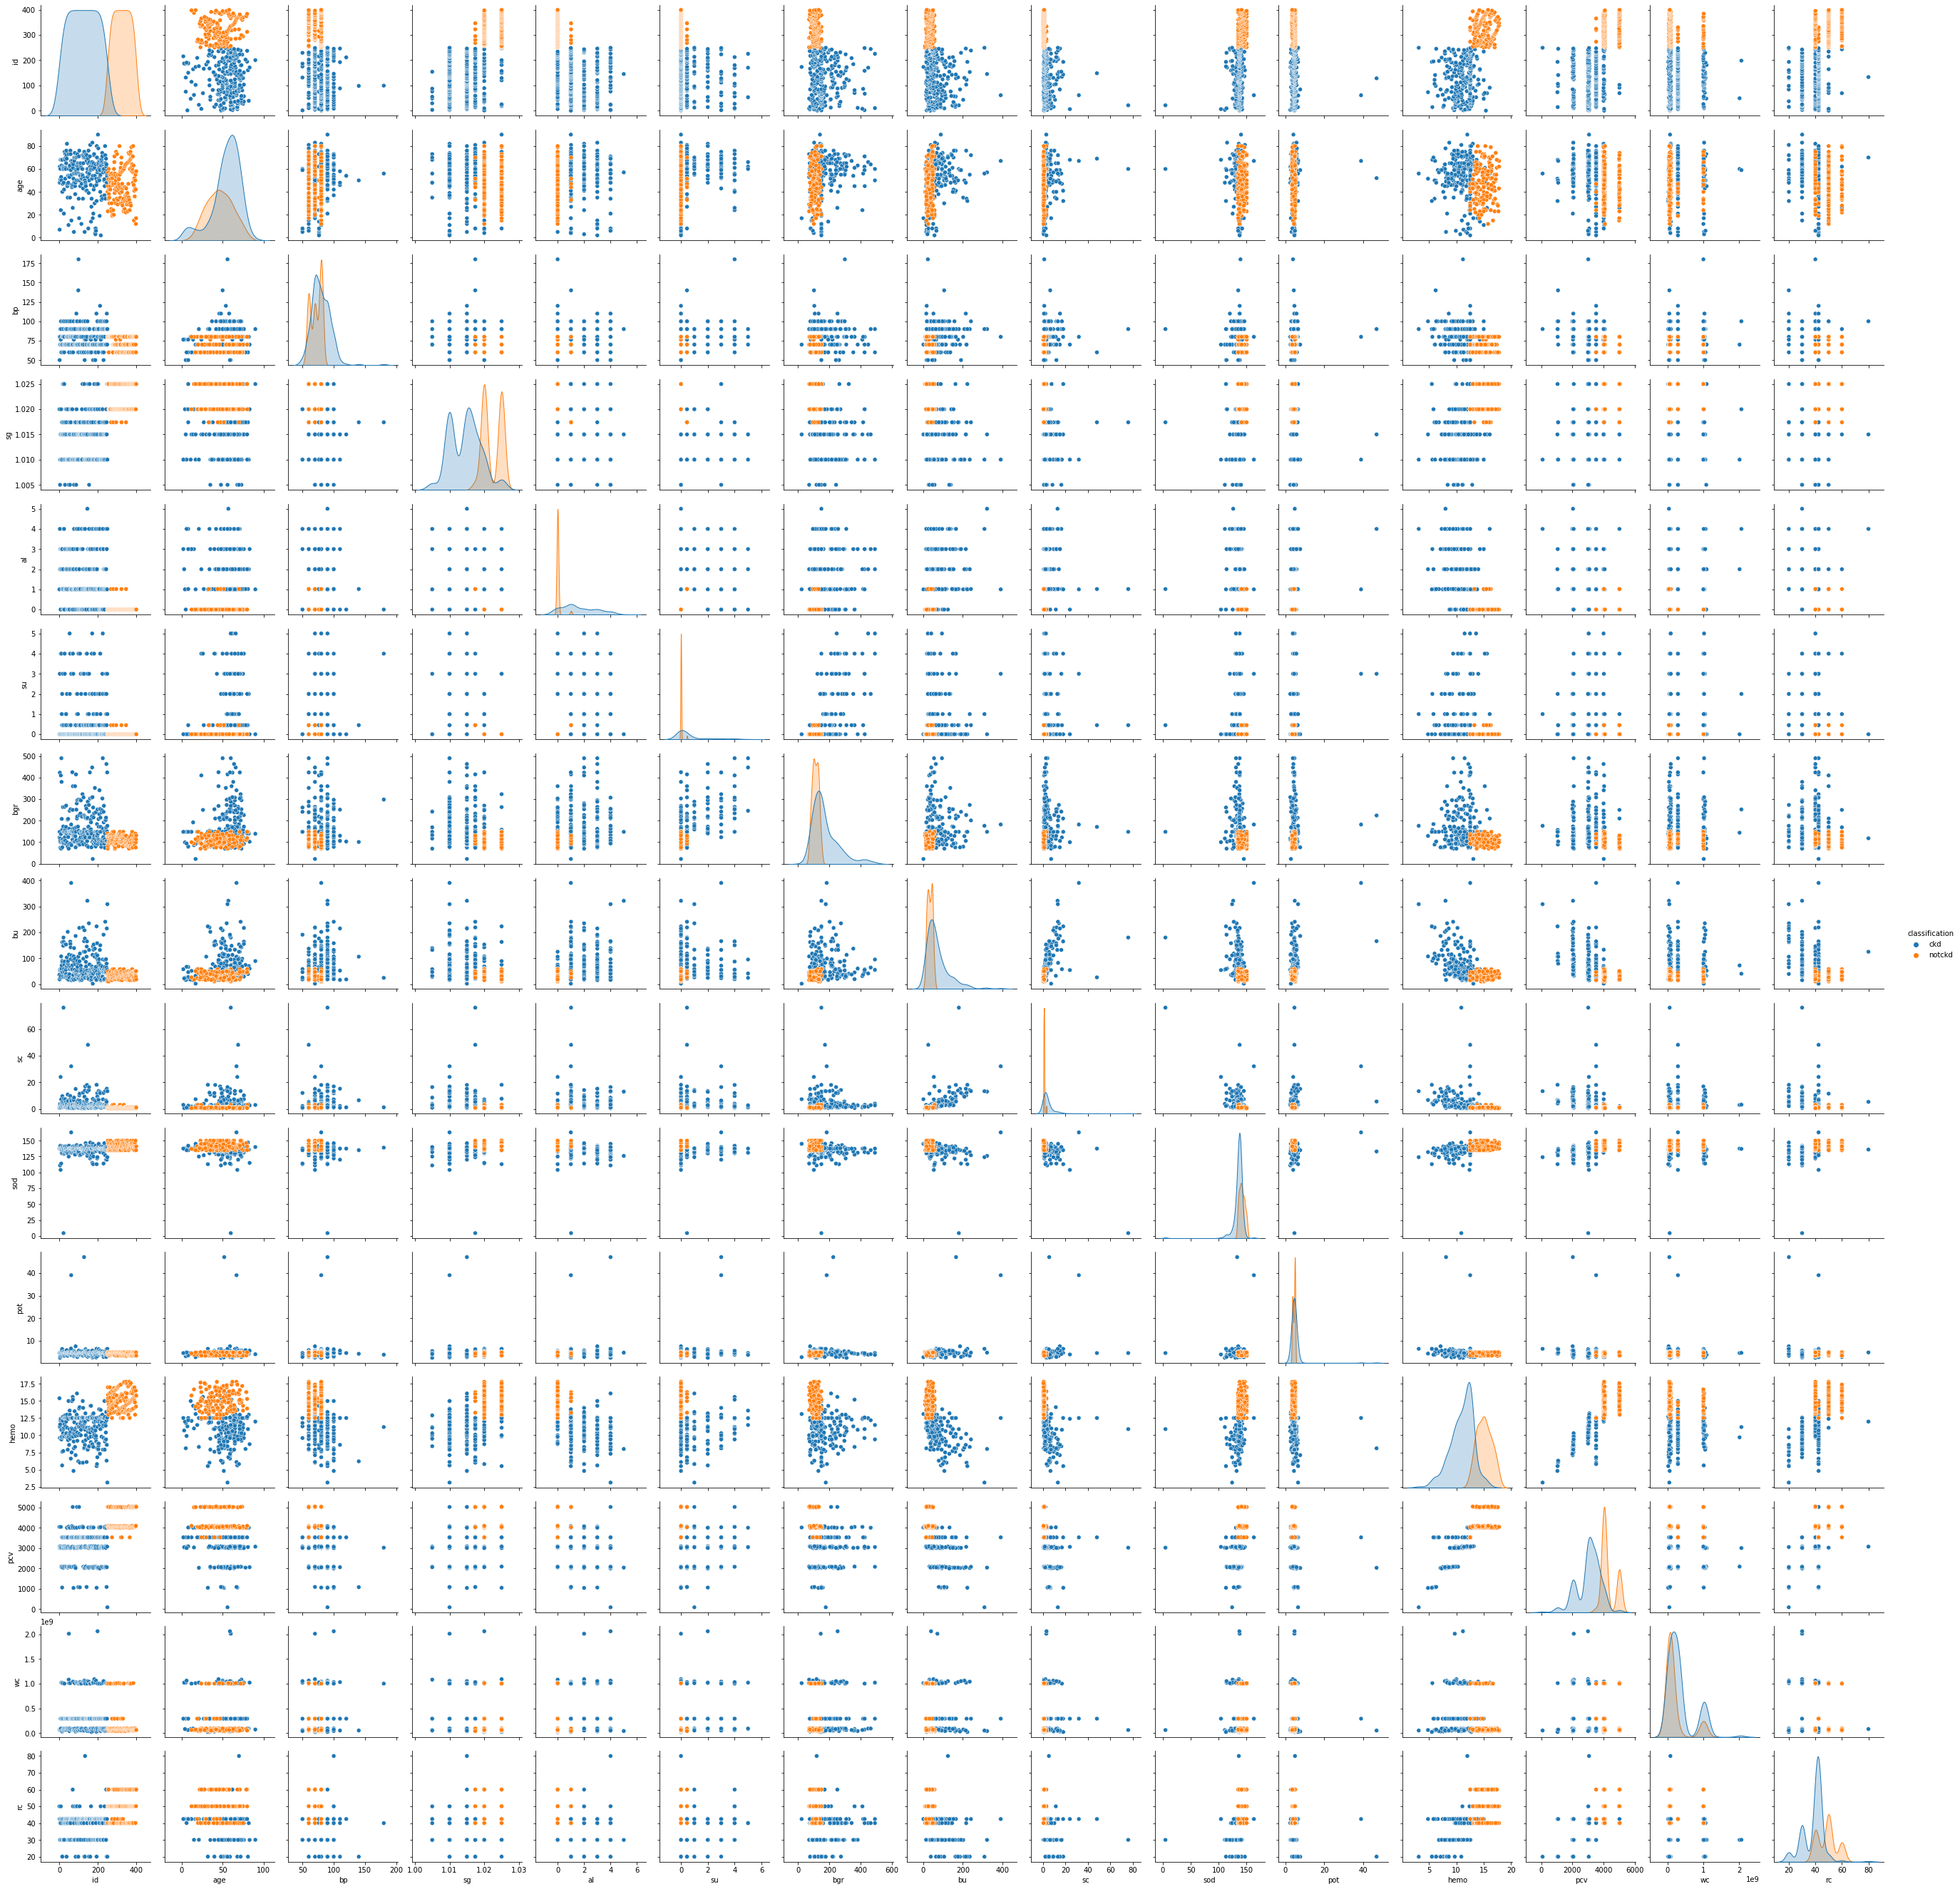

In [11]:
sns.pairplot(data=kidney_disease, hue='classification')

id, sg, al, hemo, pcv each appear to have some kind of obvious relationship with classification so I would expect these to be the most useful features.
id represents the Id Number of the person tested, so this wont be used. I assume the Ids were assigned based on classification based on the pairplot.

## Prepare dummy variables and scale
The classification is the target variable. People with chronic kidney disease with have a classification of 1, those without 0.
All categorical feautures have 2 classes, so have mapped 0 and 1 instead of creating dummy variables to reduce number of features.

In [12]:
# Map target variable
kidney_disease['classification'] = kidney_disease['classification'].map({'ckd':1, 'notckd':0})

# Map other catagorial variables
kidney_disease['rbc'] = kidney_disease['rbc'].map({'normal':1, 'abnormal':0})
kidney_disease['pc'] = kidney_disease['pc'].map({'normal':1, 'abnormal':0})
kidney_disease['pcc'] = kidney_disease['pcc'].map({'present':1, 'notpresent':0})
kidney_disease['ba'] = kidney_disease['ba'].map({'present':1, 'notpresent':0})
kidney_disease['htn'] = kidney_disease['htn'].map({'yes':1, 'no':0})
kidney_disease['dm'] = kidney_disease['dm'].map({'yes':1, 'no':0})
kidney_disease['cad'] = kidney_disease['cad'].map({'yes':1, 'no':0})
kidney_disease['appet'] = kidney_disease['appet'].map({'good':1, 'poor':0})
kidney_disease['pe'] = kidney_disease['pe'].map({'yes':1, 'no':0})
kidney_disease['ane'] = kidney_disease['ane'].map({'yes':1, 'no':0})

Scaling is important because logistic regression models the probability of a certain class, and if the data is not scaled, features with larger values will have more influence on the model than features with smaller values. Scaling the data also helps to avoid numerical instability and improve the performance of the model.

In [24]:
# Scaling
scaler = MinMaxScaler()
scaled_kidney_disease = pd.DataFrame(scaler.fit_transform(kidney_disease), columns=kidney_disease.columns)


## Feature selection (using logistic regression)

Strengths:

Logistic regression is easy to interpret, as the model coefficients can be used to infer the importance of each feature in the prediction.
Logistic regression is easy to implement and requires little tuning.
The model can be regularized to prevent overfitting.

Weaknesses:

*Logistic regression assumes that the relationship between the input features and the outcome is linear, which may not be the case for all datasets.
*Logistic regression also assumes that there is no multicollinearity among the input features.
Logistic regression is sensitive to outliers and extreme values.

Assumptions:

Logistic regression assumes that the outcome is binary.
*Logistic regression assumes that the input features are independent of each other.
*Logistic regression assumes that there is a linear relationship between the input features and the log-odds of the outcome.
Logistic regression assumes that the data is free of missing values and outliers.

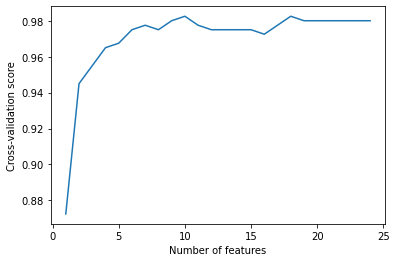

sg
al
bgr
hemo
pcv
rc
htn
dm
appet
pe


In [14]:
# Define the X and y variables
X = scaled_kidney_disease.drop(['classification', 'id'], axis=1)
y = scaled_kidney_disease['classification']

# Create the logistic regression model
logreg = LogisticRegression()

# Create an empty list to store the cross-validation scores
scores = []

# Create an empty list to store the selected features
selected_features = []

# Define the range of number of features to select
n_features_range = range(1, len(X.columns) + 1)

# Iterate over different number of features to select
for n_features in n_features_range:
    # Create the SelectKBest object
    feature_selector = SelectKBest(f_classif, k=n_features)
    feature_selector.fit(X, y)
    # Get the selected features
    selected_features.append(X.columns[feature_selector.get_support()])
    # Calculate the cross-validation score
    score = cross_val_score(logreg, X[X.columns[feature_selector.get_support()]], y, cv=5).mean()
    scores.append(score)

# Plot the number of features against the cross-validation score
plt.plot(n_features_range, scores)
plt.xlabel('Number of features')
plt.ylabel('Cross-validation score')
plt.show()

# Get the index of the feature with the highest score
best_index = scores.index(max(scores))

# Print the selected features in the order of most useful to least
for feature in selected_features[best_index]:
    print(feature)


Interesting all of the top 5 except bgr were flagged in EDA as having some kind of obvious relationship with classification.

## Logistic Regression

In [18]:
X = scaled_kidney_disease[['sg', 'al', 'bgr', 'hemo', 'pcv']]
y = scaled_kidney_disease['classification']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
# Build Model
model = LogisticRegression()
# Fit Model
model.fit(X_train, y_train)

# Make predictions on the training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate the accuracy on the training and test sets
train_accuracy = metrics.accuracy_score(y_train, y_train_pred)
test_accuracy = metrics.accuracy_score(y_test, y_test_pred)

# Print the accuracy on the training and test sets
print(f'Training accuracy: {train_accuracy:.2f}')
print(f'Test accuracy: {test_accuracy:.2f}')

# Check for overfitting
if train_accuracy > test_accuracy:
    print("Model is overfitting")
else:
    print("Model is not overfitting")


# Examine confusion matrix and classification report
conf_mat = metrics.confusion_matrix(y_test, y_test_pred)
cr = metrics.classification_report(y_test, y_test_pred)

print(conf_mat)
print(cr)

Training accuracy: 0.97
Test accuracy: 0.98
Model is not overfitting
[[35  0]
 [ 2 63]]
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97        35
         1.0       1.00      0.97      0.98        65

    accuracy                           0.98       100
   macro avg       0.97      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



In [19]:
# Create the logistic regression model with L2 regularization
logreg_l2 = LogisticRegression(penalty='l2', C=1)

# Fit the model to the training data
logreg_l2.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred = logreg_l2.predict(X_test)

# Calculate the test set accuracy
test_accuracy = metrics.accuracy_score(y_test, y_test_pred)

# Print the test set accuracy
print(f'Test accuracy with L2 regularization: {test_accuracy:.2f}')

Test accuracy with L2 regularization: 0.98


High test accuracy with L2 regularisation suggests the model is able to generalise well to new, unseen data.

0.9991208791208791


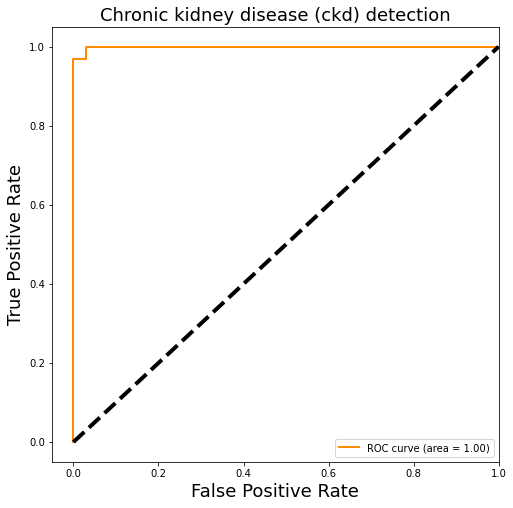

In [22]:
test_prob = logreg_l2.predict_proba(X_test)[:,1]

# For class 1, find the area under the curve
# Find fpr, tpr
fpr, tpr, _ = metrics.roc_curve(y_test, test_prob)
# Find auc
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

# Plot of a ROC curve for class 1 (has ckd)
plt.figure(figsize=[8,8])
lw=2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)

# Plot fpr, tpr
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Chronic kidney disease (ckd) detection', fontsize=18)
plt.legend(loc="lower right")
plt.show()

A good classifier will have an ROC curve close to the top left corner, suggesting this is a good classifier. It indicates a high tpr and low fpr.

## Conclusion

In conclusion, logistic regression is a powerful tool that can be used to predict a binary outcome. The ROC curve is a powerful visualization tool that helps to understand the trade-off between true positives and false positives. In this case, the AUC score of 0.999 indicates that the model is able to correctly classify 99.9% of the cases. Overall, the logistic regression model we have developed is able to accurately predict the presence of chronic kidney disease with a high degree of confidence.

However I suspect the reason for this is due to highly correlated features as the dataset is not particularly large.

Some of the features used were bgr - blood glucose, hemo - hemoglobin levels, and pcv - packed cell volume all have direct links to kidney disease, and likely have high correlations due to this.

https://www.rroij.com/open-access/packed-cell-volume-reticulocyte-count-and-index-among-patients-with-chronic-kidney-disease-in-sokoto-north-western-nigeria.php?aid=34765
https://journals.lww.com/jasn/Abstract/2006/01000/Low_Hemoglobin,_Chronic_Kidney_Disease,_and_Risk.36.aspx#:~:text=Low%20hemoglobin%20can%20be%20a,in%20people%20with%20higher%20hemoglobin.
https://www.betterhealth.vic.gov.au/health/conditionsandtreatments/diabetes-and-kidney-failure
